# EDA

In [238]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [239]:
# data import
df = sns.load_dataset("titanic")

In [240]:
# bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [241]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [242]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [243]:
df['survived'].unique()

array([0, 1])

In [244]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [245]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [246]:
df['age'].nunique()

88

In [247]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [248]:
df['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [249]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

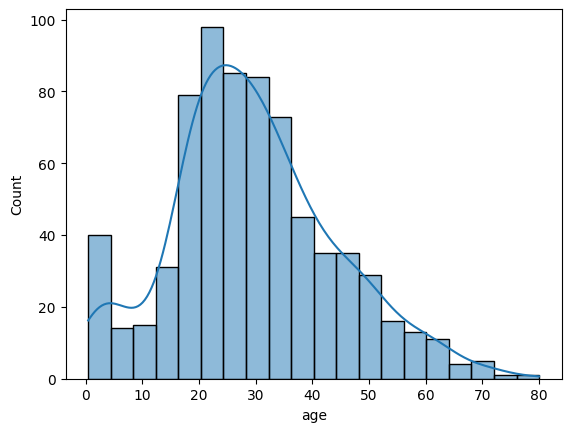

In [250]:
sns.histplot(df, x=df['age'], kde=1)

In [251]:
df2 = df

In [252]:
df2['age'].isna().sum()

np.int64(177)

In [253]:
df2 = df2.dropna(subset=['age'])  # Drops rows with NaN in 'age'


In [254]:
len(df2['age'])


714

In [255]:
df2['age'].nunique()


88

In [256]:
df2.loc[:, 'age'] = pd.to_numeric(df2['age'], errors='coerce')

In [257]:
stats.shapiro(df2['age'])

ShapiroResult(statistic=np.float64(0.9814577414504954), pvalue=np.float64(7.337348958673592e-08))

<Axes: xlabel='fare', ylabel='Count'>

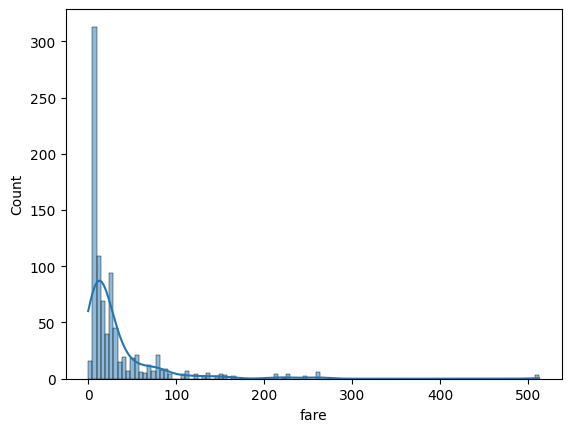

In [258]:
sns.histplot(df, x=df['fare'], kde=1)

In [259]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

<Axes: xlabel='class', ylabel='fare'>

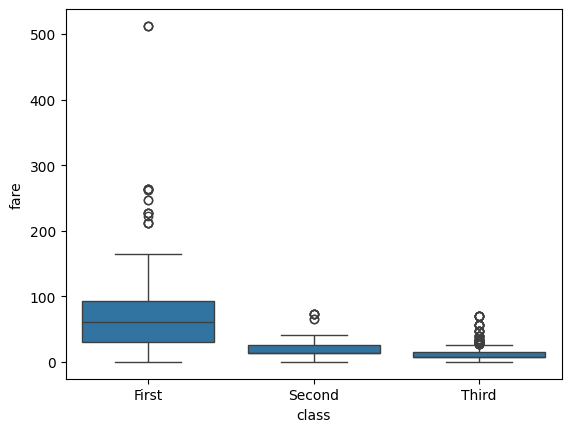

In [260]:
sns.boxplot(df, x='class', y='fare')

In [261]:
df_first = df[df['class']=='First']

In [262]:
stats.shapiro(df_first['fare'])

ShapiroResult(statistic=np.float64(0.7184011166151456), pvalue=np.float64(7.556208132385032e-19))

In [263]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [264]:
# subset
df_first = df[df['class']=='First']
# IQR Method
Q1 = df_first['fare'].quantile(0.25)
Q3 = df_first['fare'].quantile(0.75)

IQR = Q3-Q1
IQR

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_outliers_removed = df_first[(df_first['fare']>lower_bound)&(df_first['fare']<upper_bound)]
df_outliers_removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

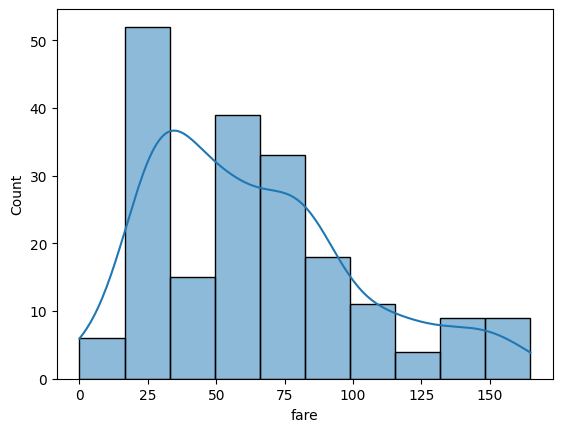

In [265]:
sns.histplot(df_outliers_removed['fare'], kde=1)

In [266]:
stats.shapiro(df_outliers_removed['fare'])

ShapiroResult(statistic=np.float64(0.9243669055626075), pvalue=np.float64(1.6046327508760568e-08))

In [267]:
# subset
df_second = df[df['class']=='Second']
# IQR Method
Q1 = df_second['fare'].quantile(0.25)
Q3 = df_second['fare'].quantile(0.75)

IQR = Q3-Q1
IQR

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_outliers_removed = df_second[(df_second['fare']>lower_bound)&(df_second['fare']<upper_bound)]
df_outliers_removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

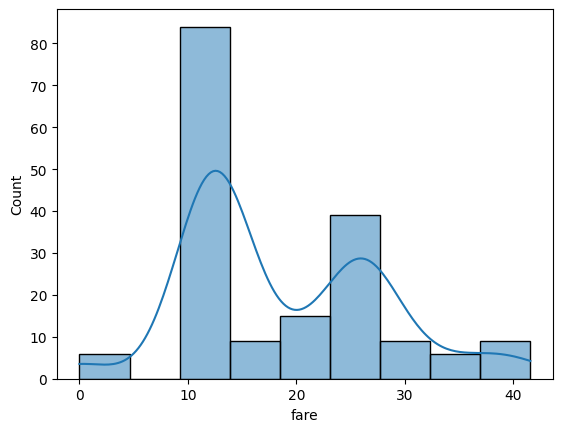

In [268]:
sns.histplot(df_outliers_removed['fare'], kde=1)

In [269]:
stats.shapiro(df_outliers_removed['fare'])

ShapiroResult(statistic=np.float64(0.9008325469951028), pvalue=np.float64(1.6276233394349399e-09))

In [270]:
# subset
df_third = df[df['class']=='Third']
# IQR Method
Q1 = df_third['fare'].quantile(0.25)
Q3 = df_third['fare'].quantile(0.75)

IQR = Q3-Q1
IQR

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_outliers_removed = df_third[(df_third['fare']>lower_bound)&(df_third['fare']<upper_bound)]
df_outliers_removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


<Axes: xlabel='fare', ylabel='Count'>

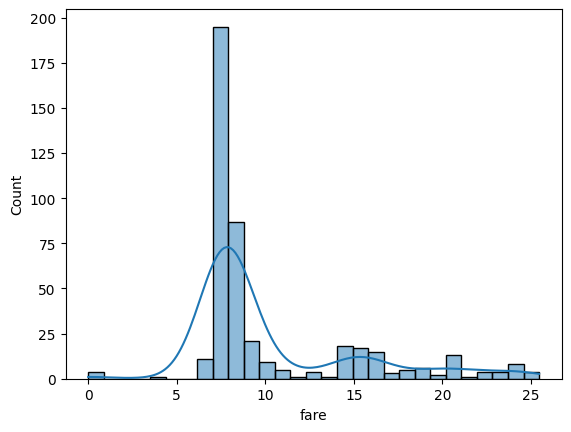

In [271]:
sns.histplot(df_outliers_removed['fare'], kde=1)

In [272]:
stats.shapiro(df_outliers_removed['fare'])

ShapiroResult(statistic=np.float64(0.7252326564508582), pvalue=np.float64(2.912164281778183e-26))

In [273]:
# subset
df2 = df
df2['fare'] = np.log(df2['fare'])
df2.head()
stats.shapiro(df2['fare'])

# method

# code

# norrmal dist test

c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(1.0))

<Axes: xlabel='fare', ylabel='Count'>

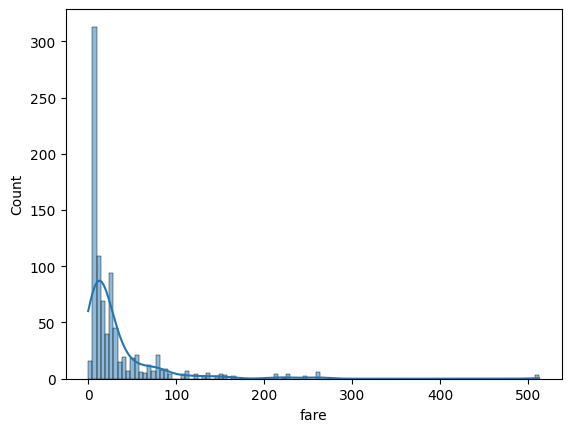

In [274]:
df = sns.load_dataset("titanic")
sns.histplot(df['fare'], kde=1)